In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
import string
import nltk
from nltk.corpus import stopwords
import en_core_web_sm
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import operator
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

Read the Reviews dataset

In [2]:
rev=pd.read_csv('yelp/yelp_review.csv',encoding='UTF-8')

Filter based on the Business_id K7lWdNUhCbcnEvI0NhGewg,Its named Wicked Spoon


In [3]:
filt_condition='business_id'
filt_variable='K7lWdNUhCbcnEvI0NhGewg'

In [4]:
rev1=rev[rev[filt_condition]==filt_variable]

Tokenize the reviews and remove stopwords

In [5]:
rev1['tokenized_text'] = rev1['text'].apply(lambda x:x.lower()).apply(word_tokenize) 

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
punctuation = list(string.punctuation)
stopWords = set(stopwords.words('english'))

In [7]:
docs=list(rev1['tokenized_text'])

In [8]:
filtered_docs=[]
for i in docs:
    filt = []
    for w in i:
        if w.lower()not in stopWords and w not in punctuation:
            filt.append(w)
    filtered_docs.append(filt)

Perform Stemming


In [9]:
nlp = en_core_web_sm.load()

In [10]:
final_txt=[[t.lemma_ for t in nlp(' '.join(i))] for i in filtered_docs]

Run gensim wor2vec model


In [11]:
model = gensim.models.Word2Vec(final_txt,size=150,window=10,min_count=10,workers=10,iter=10)

In [12]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform([ ' '.join(i) for i in final_txt ])

Get the tfidf documnet word matrix

In [13]:
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform([ ' '.join(i) for i in final_txt ])

In [14]:
vocab = [v[0] for v in sorted(vect.vocabulary_.items(), key=operator.itemgetter(1))]


In [16]:
rev1=rev1.reset_index()

Pick the reviews with star rating greater than 4 as Positive and star rating less than 2 as negative 

In [17]:
pos_lis=list(rev1[rev1.stars>4].index)
neg_lis=list(rev1[rev1.stars<2].index)

Get the Tf-IDF Matrix of the postive and Negative reviews

In [18]:
pos=np.ravel(tfidf_matrix.toarray()[pos_lis].sum(axis=0))
neg=np.ravel(tfidf_matrix.toarray()[neg_lis].sum(axis=0))

In [ ]:
posd=dict(zip(vocab, pos))
negd=dict(zip(vocab, neg))

Get the top Postive Sentiment words and Negative sentiment words based on tf-idf values

In [20]:
poswords=sorted(posd.items(),key=operator.itemgetter(1),reverse=True)
negwords=sorted(negd.items(),key=operator.itemgetter(1),reverse=True)

In [21]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)


Word Cloud of top 50 Postive and Negative words

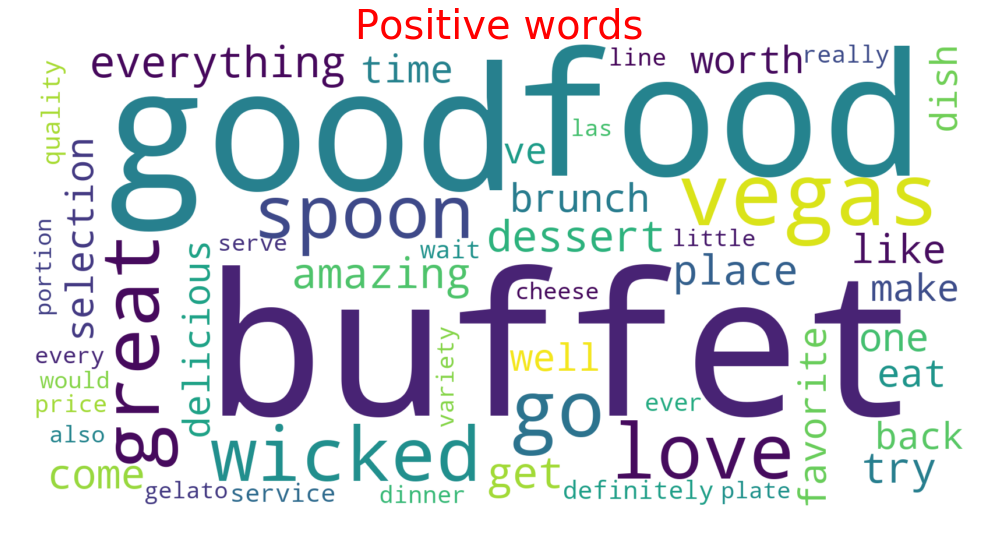

In [22]:
wordcloud.generate_from_frequencies(dict(poswords[:50]))
plt.figure(figsize=(20,10))
plt.title("Positive words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

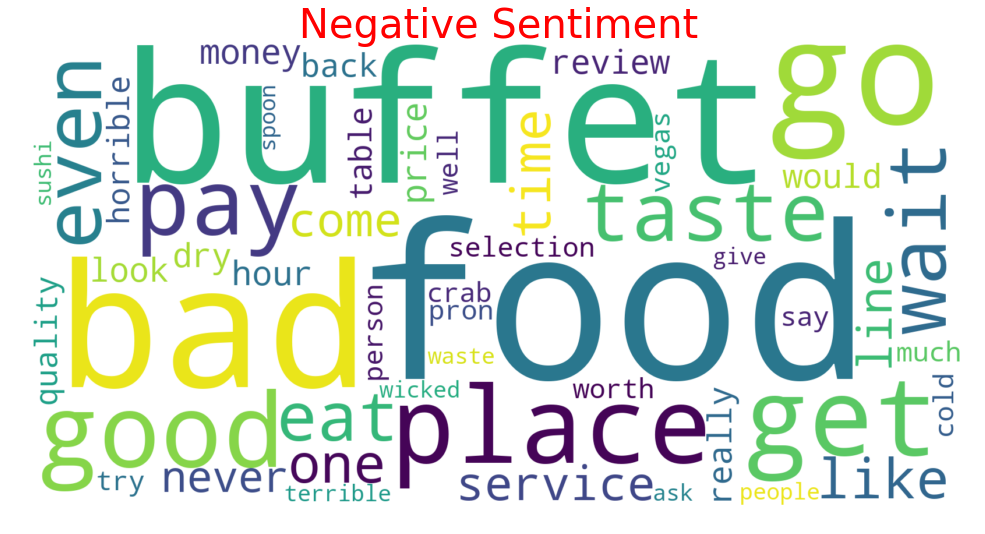

In [23]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
wordcloud.generate_from_frequencies(dict(negwords[:50]))
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

From Negative words we can see that people are talking about bad buffet,To know whats bad about the buffet, I use the word2vec model to get most similiar words and I get the below word cloud

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


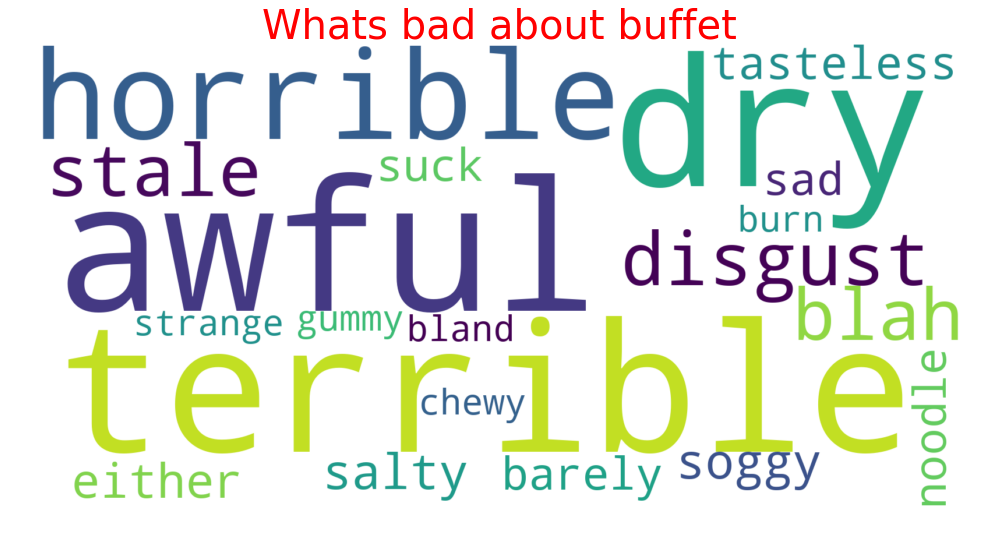

In [26]:
wordcloud.generate_from_frequencies(dict(model.most_similar(['bad'],['buffet'],topn=20)))
plt.figure(figsize=(20,10))
plt.title("Whats bad about buffet", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

People dont like the buffet because they find it dry,salty,soggy,chewy,gummy and stale

From Psoitive words we can see that people are talking about good buffet,To know whats bad about the buffet, I use the word2vec model to get most similiar words and I get the below word cloud

We can see the users like food which is of pumpkin,sweet,corn,soft,sticky and sour

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


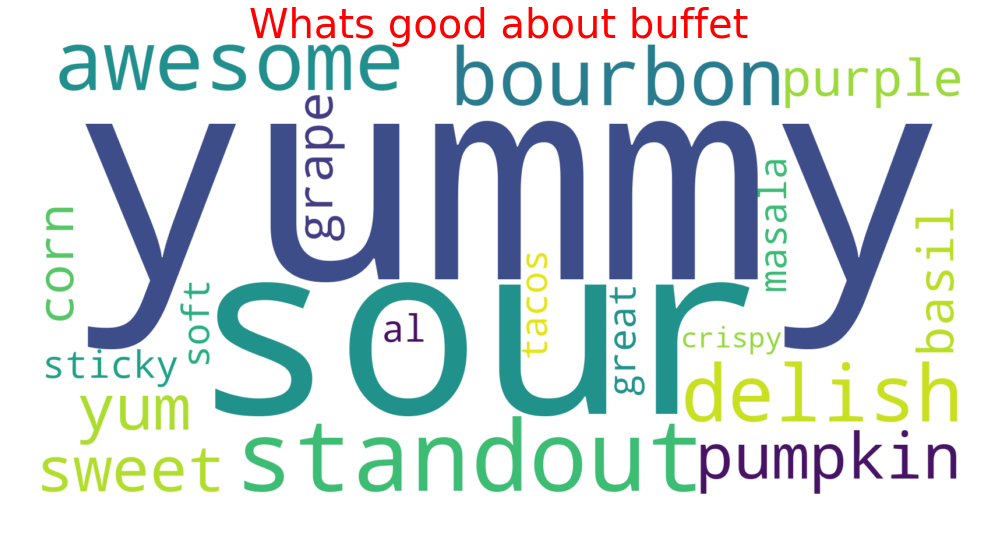

In [25]:
wordcloud.generate_from_frequencies(dict(model.most_similar(['good'],['buffet'],topn=20)))
plt.figure(figsize=(20,10))
plt.title("Whats good about buffet", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [44]:
model.most_similar(['bad'],['buffet'])

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'awful', 0.6168619990348816),
 (u'dry', 0.5960819125175476),
 (u'sad', 0.5884531140327454),
 (u'terrible', 0.5633389949798584),
 (u'horrible', 0.5576736927032471),
 (u'barely', 0.541740357875824),
 (u'either', 0.539523720741272),
 (u'stale', 0.5261691808700562),
 (u'soggy', 0.521069347858429),
 (u'blah', 0.5190366506576538)]

In [43]:
model.most_similar(['good'],['buffet'])

/home/vishwa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'yummy', 0.5518378019332886),
 (u'delish', 0.5467193126678467),
 (u'awesome', 0.5270352363586426),
 (u'standout', 0.5096603035926819),
 (u'sour', 0.5011907815933228),
 (u'yum', 0.4844330847263336),
 (u'pumpkin', 0.4805246591567993),
 (u'lox', 0.4790267050266266),
 (u'bourbon', 0.47874510288238525),
 (u'sticky', 0.47652220726013184)]